In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\AMZN_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close     Volume  \
33 1997-07-02  0.075781  0.079688  0.075521  0.079427   0.079427   77640000   
34 1997-07-03  0.079948  0.095833  0.079688  0.095573   0.095573  251544000   
35 1997-07-07  0.091667  0.101042  0.091667  0.100000   0.100000  161064000   
36 1997-07-08  0.102083  0.116667  0.102083  0.115104   0.115104  310344000   
37 1997-07-09  0.115104  0.119271  0.113542  0.116146   0.116146  165240000   
38 1997-07-10  0.116667  0.128646  0.116667  0.128125   0.128125  181032000   
39 1997-07-11  0.126042  0.126042  0.110417  0.114583   0.114583  210624000   
40 1997-07-14  0.116146  0.116667  0.105729  0.106771   0.106771   92088000   
41 1997-07-15  0.106771  0.123958  0.106771  0.121875   0.121875  185496000   
42 1997-07-16  0.122396  0.124740  0.115104  0.116667   0.116667   60480000   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
33        0.0           0.0  0.077474  45.905515  0.08273

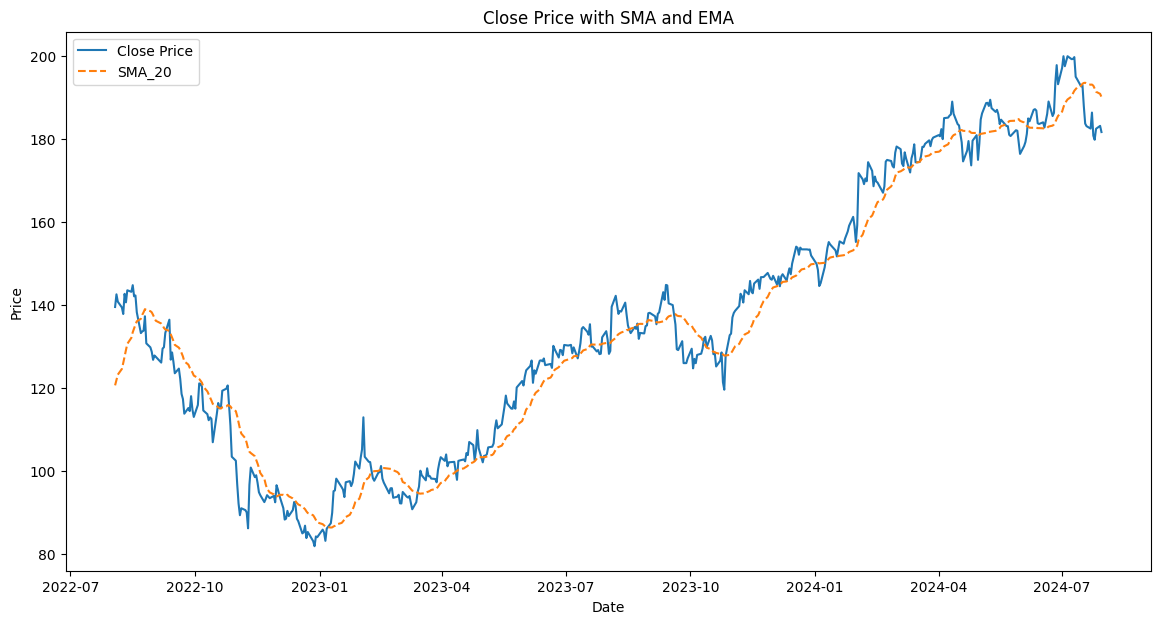

In [4]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


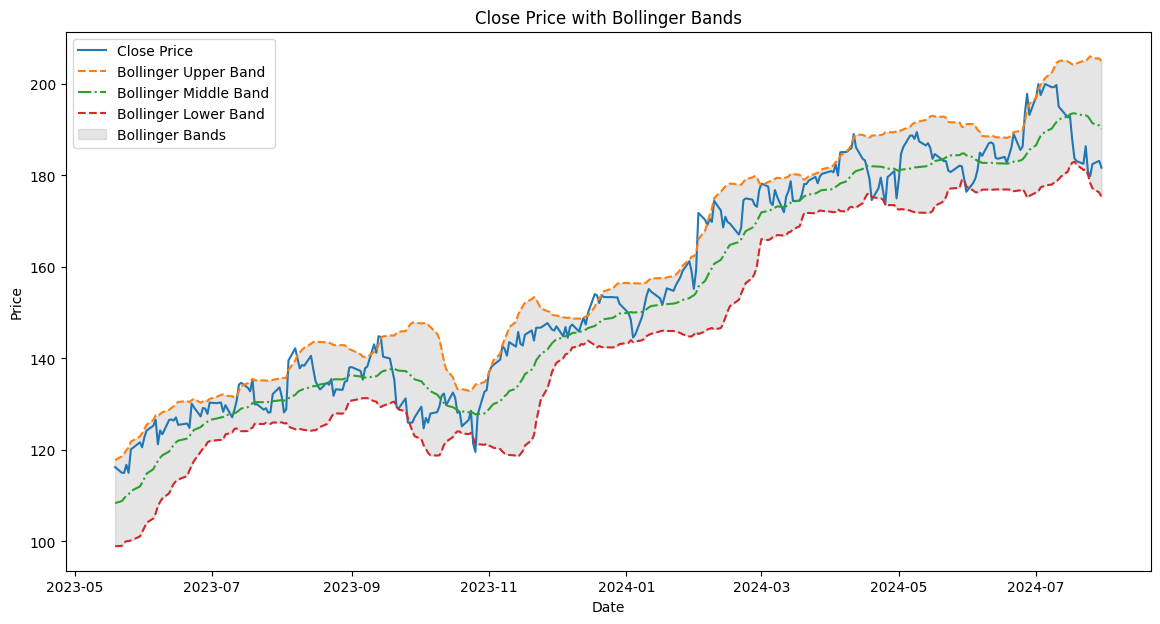

In [5]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



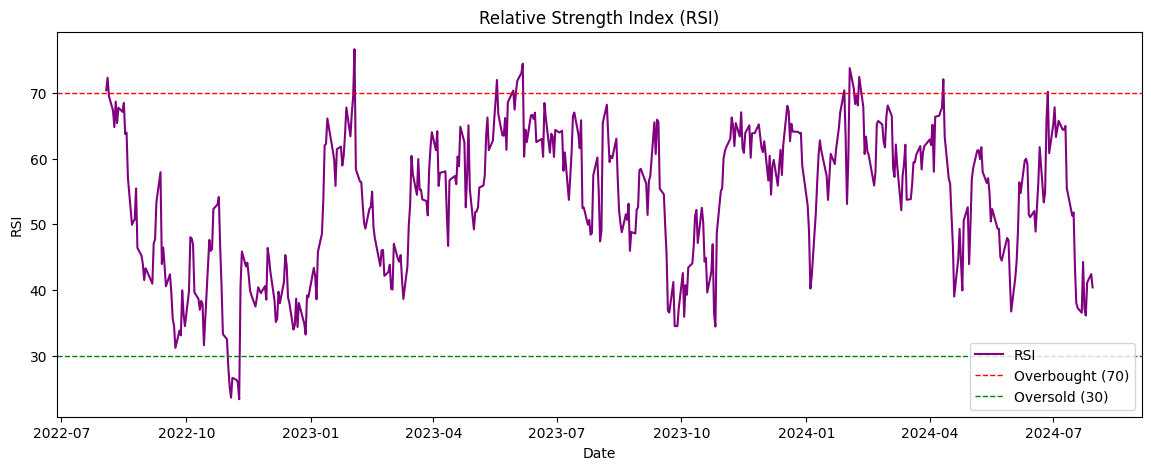

In [6]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

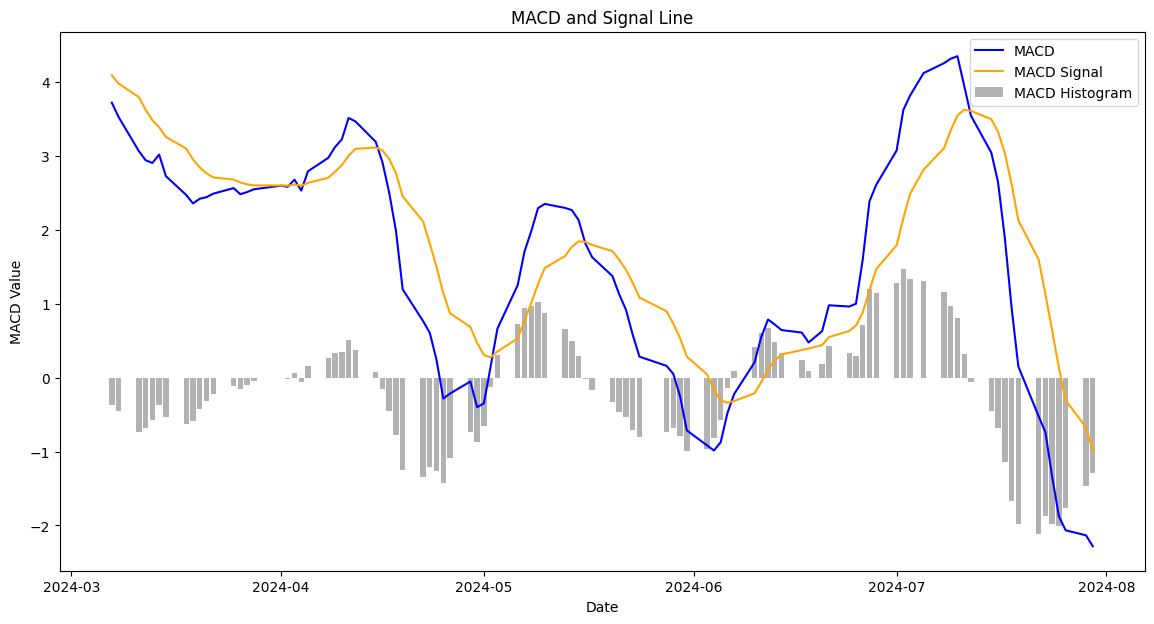

In [7]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


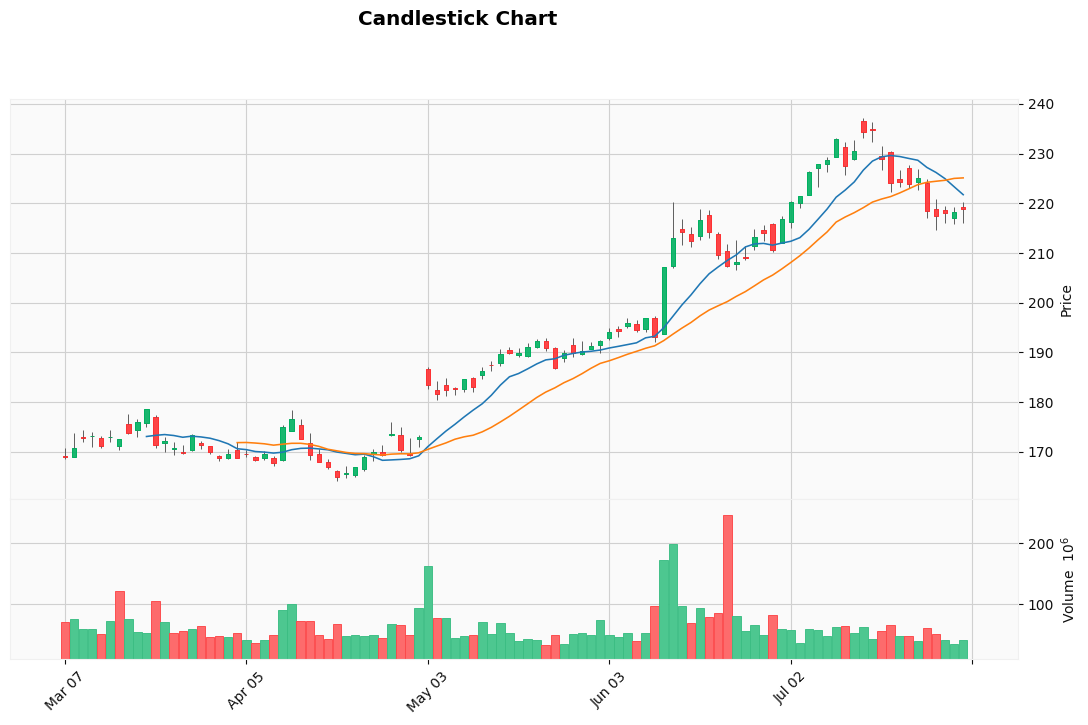

In [8]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [8]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'AMZN'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date    Open     High     Low   Close    Volume
0 2023-12-29  153.10  153.890  151.03  151.94  39823204
1 2023-12-28  153.72  154.080  152.95  153.38  27057002
2 2023-12-27  153.56  154.780  153.12  153.34  31434733
3 2023-12-26  153.56  153.975  153.03  153.41  25067222
4 2023-12-22  153.77  154.350  152.71  153.42  29514093
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [9]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date    Open      High      Low   Close    Volume    SMA_20  \
19 2023-12-01  146.00  147.2450  145.550  147.03  39951833  149.8240   
20 2023-11-30  144.76  146.9300  144.332  146.09  65814022  149.5315   
21 2023-11-29  147.85  148.5400  145.970  146.32  40610907  149.1785   
22 2023-11-28  146.98  147.5999  145.530  147.03  42711682  148.8630   
23 2023-11-27  147.53  149.2600  146.880  147.73  53762428  148.5790   

        EMA_20        RSI  BB_middle    BB_upper    BB_lower      MACD  \
19  148.731837  36.756126   149.8240  156.661437  142.986563 -1.691299   
20  148.480233  37.906137   149.5315  156.487289  142.575711 -1.686366   
21  148.274497  34.099617   149.1785  156.027701  142.329299 -1.644935   
22  148.155973  35.284281   148.8630  155.482541  142.243459 -1.537092   
23  148.115404  44.541910   148.5790  154.855646  142.302354 -1.379242   

    MACD_signal  MACD_hist  
19    -1.266400  -0.424898  
20    -1.350393  -0.335972  
21    -1.409302  -0.235633  
22    

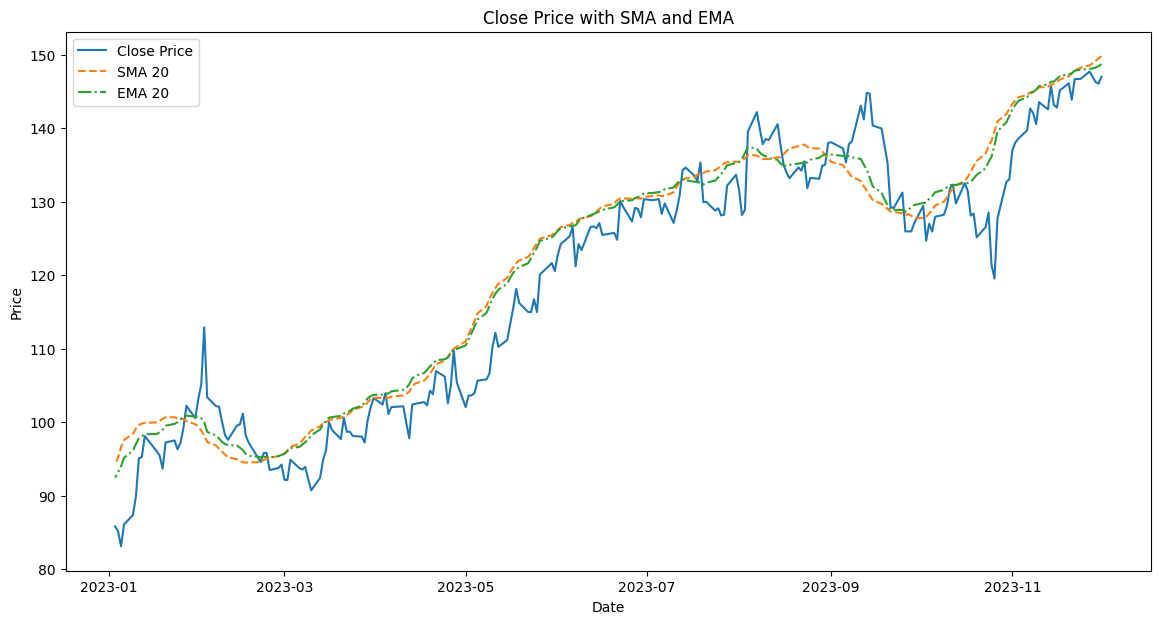

In [10]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

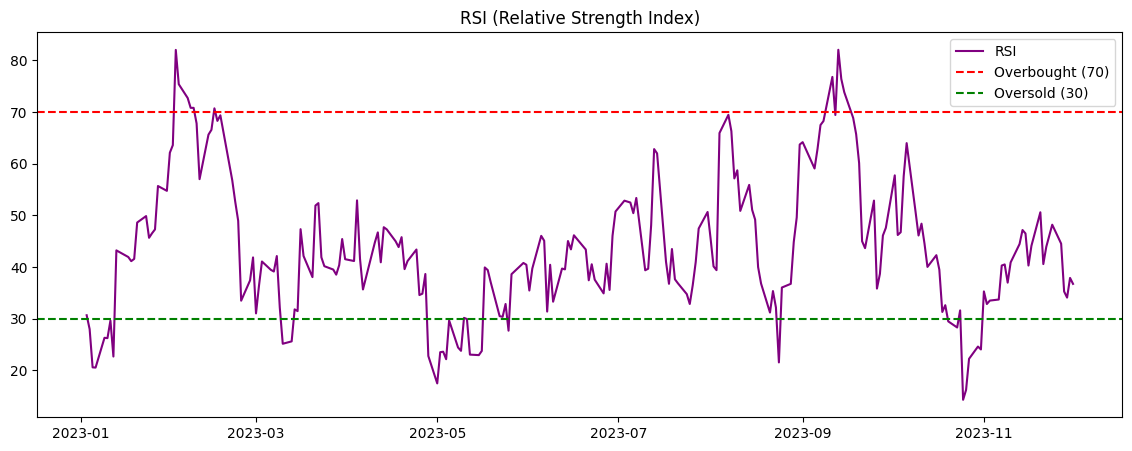

In [11]:

pa.plot_rsi(data)

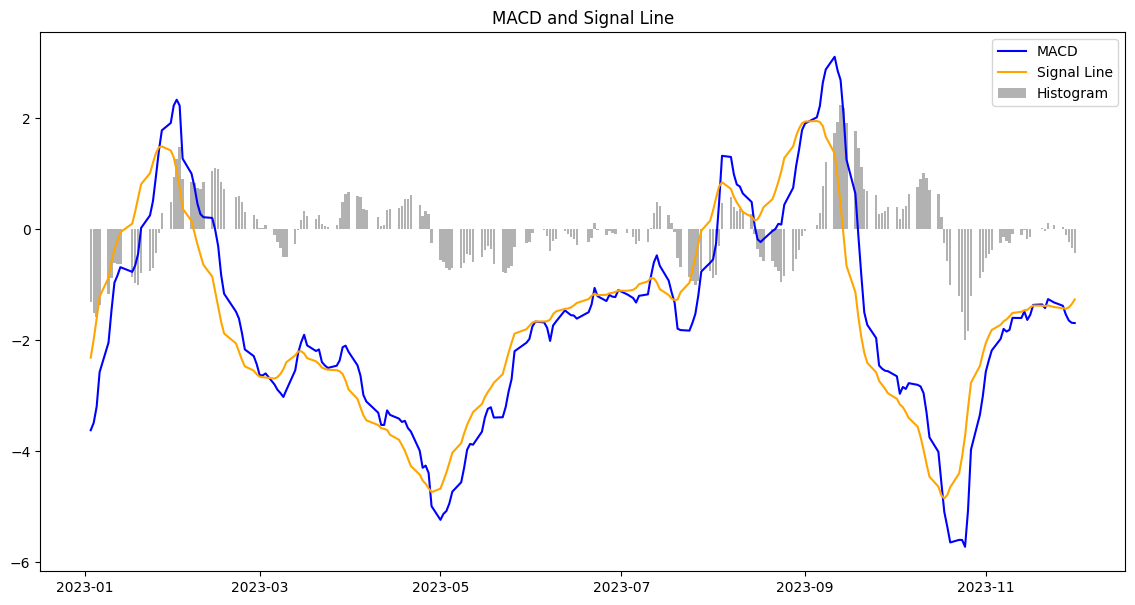

In [12]:
pa.plot_macd(data)

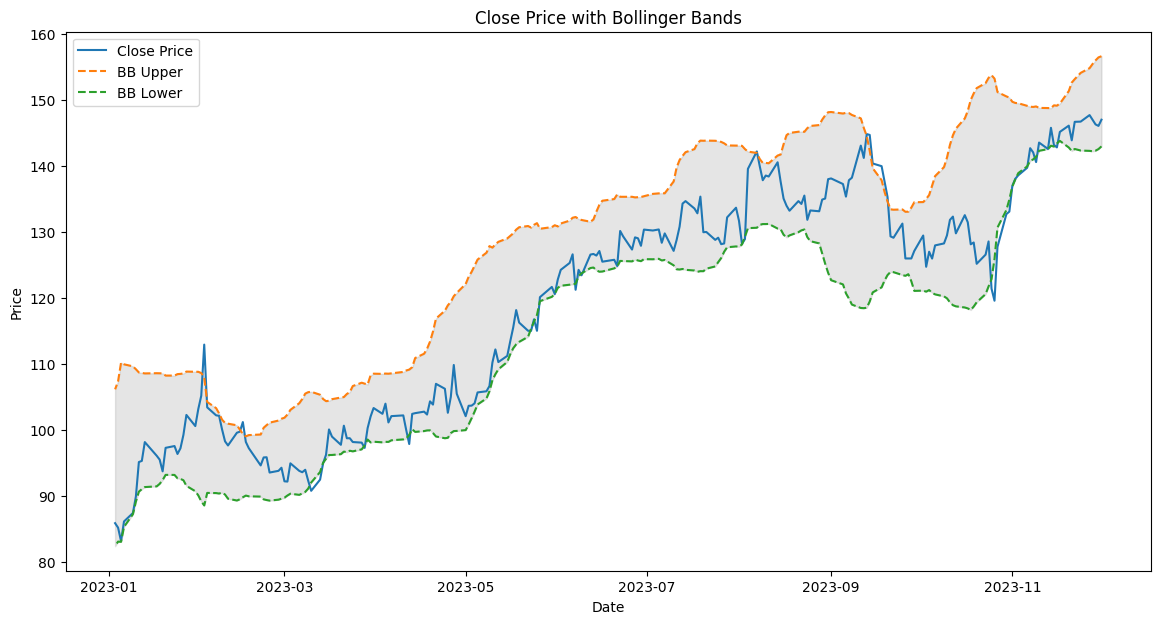

In [13]:
pa.plot_bollinger_bands(data)

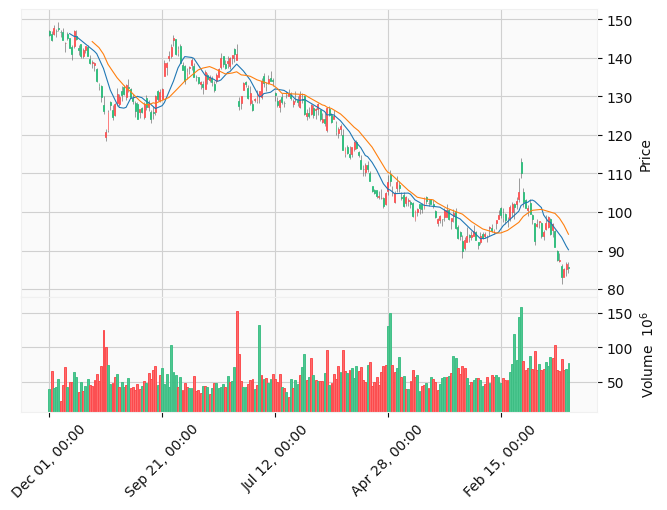

In [14]:
pa.plot_candlestick_chart(data)